# Reproducing the paper and extension to new data.

In [1]:
from src.methods import *

import matplotlib.pyplot as plt
from numpy.random import default_rng

rng = default_rng()

## 1. Reproducing the paper

### a) Noisy Henon dataset

In [2]:
n = 1200
d = 4

indep_Gn = rng.standard_normal((n, d))
params = {'d': 4,
          'b': np.array([0.285, 0.29, 0.295, 0.30]),
          'sigma': 0.1,
          'x0': 1.4,
          'y0': 1,
          'n': 1200
          }

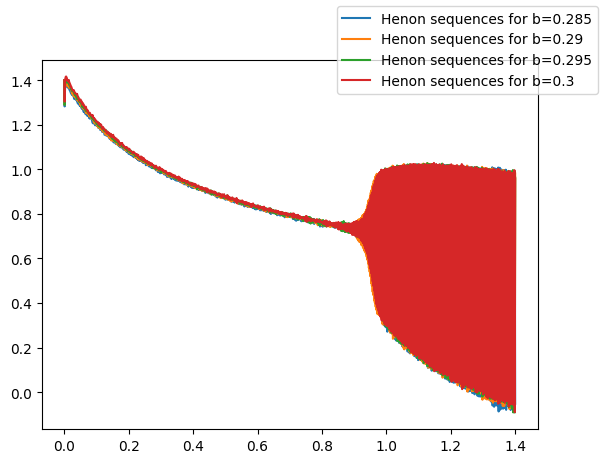

In [4]:
fig, ax = plt.subplots(ncols=1, nrows=1)
datas_Henon = NoisyHenon(**params)
a_values, xs = datas_Henon.generate_data(indep_Gn)

for i in range(d):
    ax.plot(a_values, xs[:,i], label=f"Henon sequences for b={params['b'][i]}")
fig.legend();

Sensitivity to the length of the window w :

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


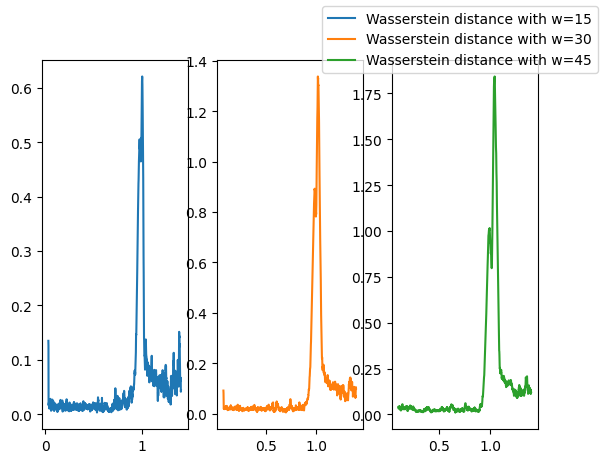

In [5]:
Ws = [15, 30, 45]

fig, ax = plt.subplots(ncols=len(Ws), nrows=1)

for (i, w) in enumerate(Ws):
    a_values, xs, wassertein_dists = datas_Henon.compute_wasserstein_distances(w, indep_Gn)
    ax[i].plot(a_values[2*w-1:], wassertein_dists, color=f'C{i}', label=f'Wasserstein distance with w={w}')

fig.legend();

### b) Detecting DotCom Bubble and 2008's Crisis

In [16]:
indices = {
    "S&P500": "^GSPC",
    "Dow Jones": "^DJI",
    "NASDAQ": "^IXIC",
    "Russell 2000": "^RUT"
}

start_date = "1996-06-01"
end_date = "2009-12-31"

In [17]:
financial_dataset = FinancialData()
data = financial_dataset.generate_data(indices, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


100%|██████████| 5/5 [00:00<00:00, 857.73it/s]


In [18]:
params = {'data': data,
          'k_homology_dimension': 1,
          'm_landscape': 5,
          'n_nodes': 1000,
          'memory_saving': (True, 1)
          }

Ws = [30, 40, 50]
w = 40

d1, l1, norms = financial_dataset.compute_landscapes(w_window_size=w, **params)

Diagram Progress: 100%|██████████| 3379/3379 [00:12<00:00, 261.30it/s]


Call


Landscapes Progress: 100%|██████████| 3379/3379 [00:03<00:00, 906.18it/s]


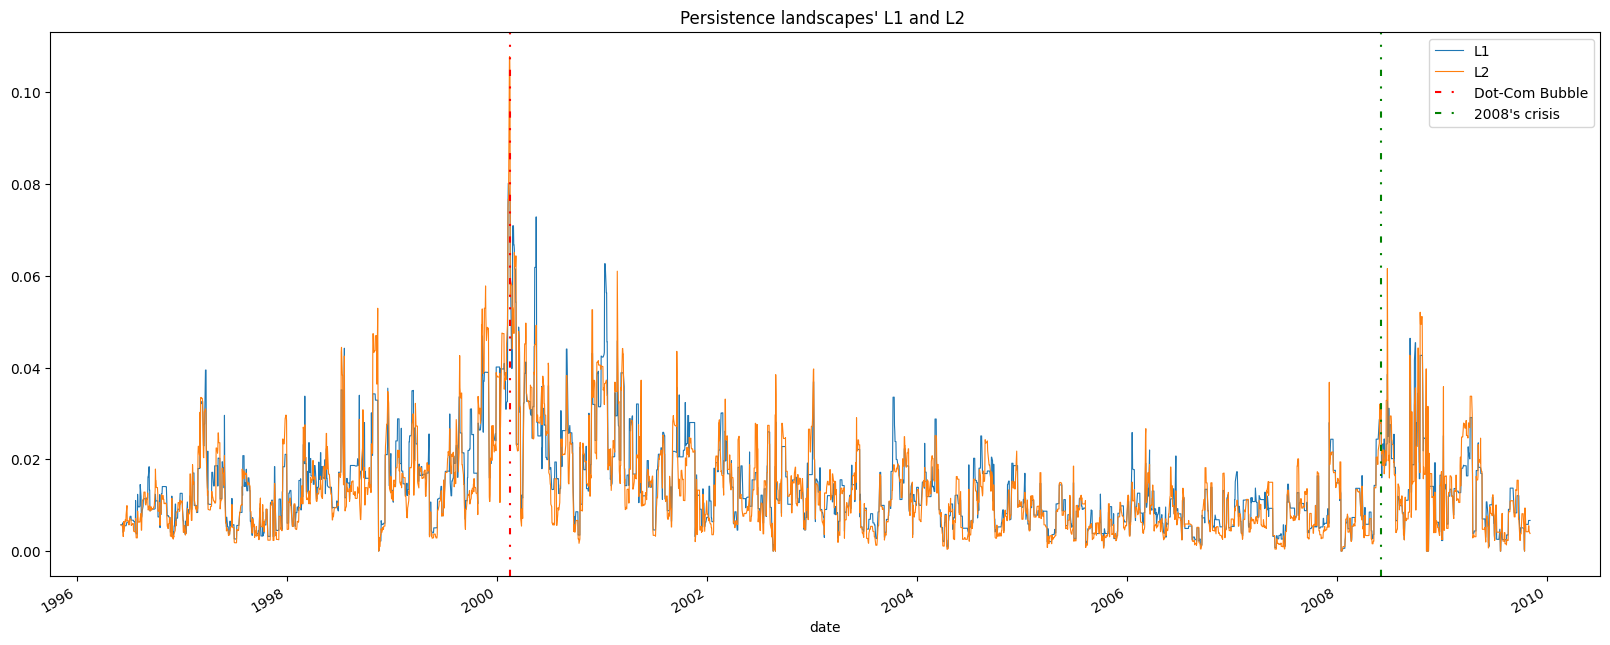

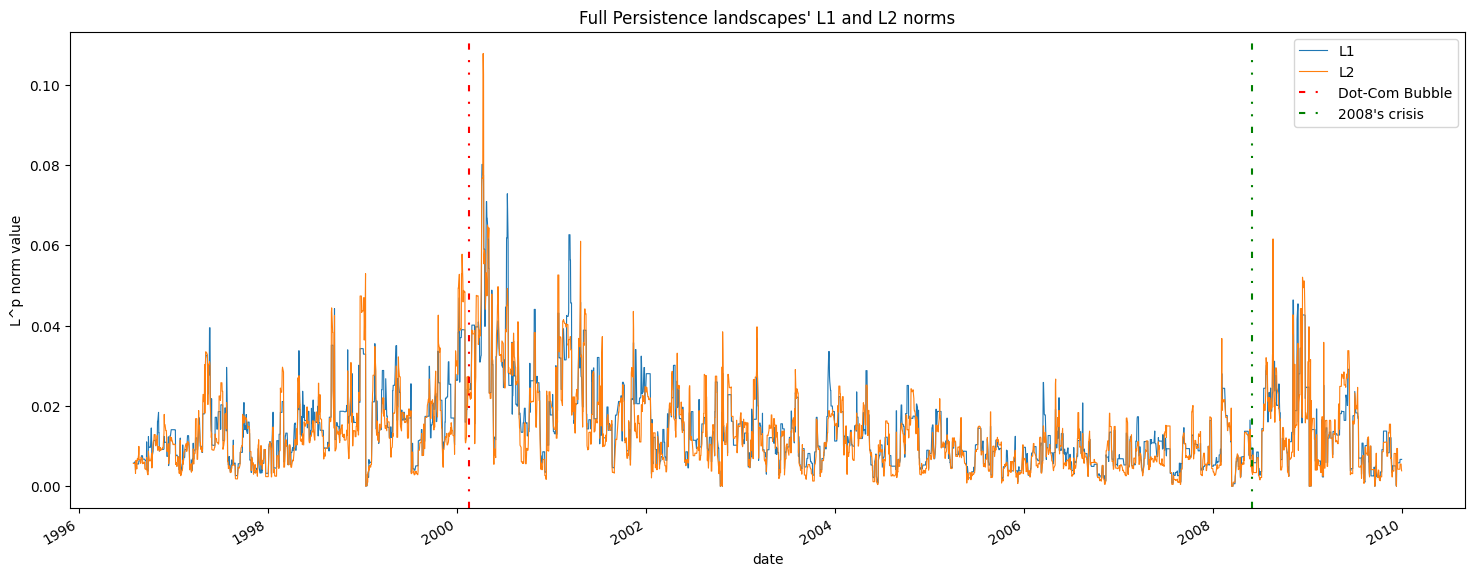

In [23]:
# Computes and print graph of dot-com bubble
df = pd.DataFrame(norms,
                columns = ["L1", "L2"],
                index   = data.index[:-w])
ax = df.plot(figsize = (20, 8),
            lw       = 0.8,
            title    = "Persistence landscapes' L1 and L2 ")
ax.axvline(x         = '2000-02-15',
        color     = 'r',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = 'Dot-Com Bubble')
ax.axvline(x         = '2008-06-01',
        color     = 'g',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = "2008's crisis")
ax.legend()
plt.show()
# Computes the full L1 and L2 time series plot
df = pd.DataFrame(norms,
                columns  = ["L1", "L2"],
                index    = data.index[w:])
ax = df.plot(figsize = (18, 7),
            lw      = 0.8,
            ylabel  = "L^p norm value",
            title   = "Full Persistence landscapes' L1 and L2 norms")
ax.axvline(x         = '2000-02-15',
        color     = 'r',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = 'Dot-Com Bubble')
ax.axvline(x         = '2008-06-01',
        color     = 'g',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = "2008's crisis")
ax.legend();

## 2. Application of the method to financial data from COVID period

In [6]:
indices = {
    "FTSE_100": "^FTSE",
    "CAC_40": "^FCHI",
    "DAX": "^GDAXI",
    "IBEX_35": "^IBEX"
}

start_date = "2019-01-01"  # Date de début avant le COVID-19
end_date = "2023-12-31"    # Date de fin actuelle

In [7]:
financial_dataset = FinancialData()
data = financial_dataset.generate_data(indices, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


100%|██████████| 5/5 [00:00<00:00, 716.83it/s]


In [10]:
params = {'data': data,
          'k_homology_dimension': 1,
          'm_landscape': 5,
          'n_nodes': 1000,
          'memory_saving': (True, 1)
          }

Ws = [30, 40, 50]
w = 40

d1, l1, norms = financial_dataset.compute_landscapes(w_window_size=w, **params)

Diagram Progress: 100%|██████████| 1212/1212 [00:04<00:00, 258.32it/s]


Call


Landscapes Progress: 100%|██████████| 1212/1212 [00:01<00:00, 754.61it/s]


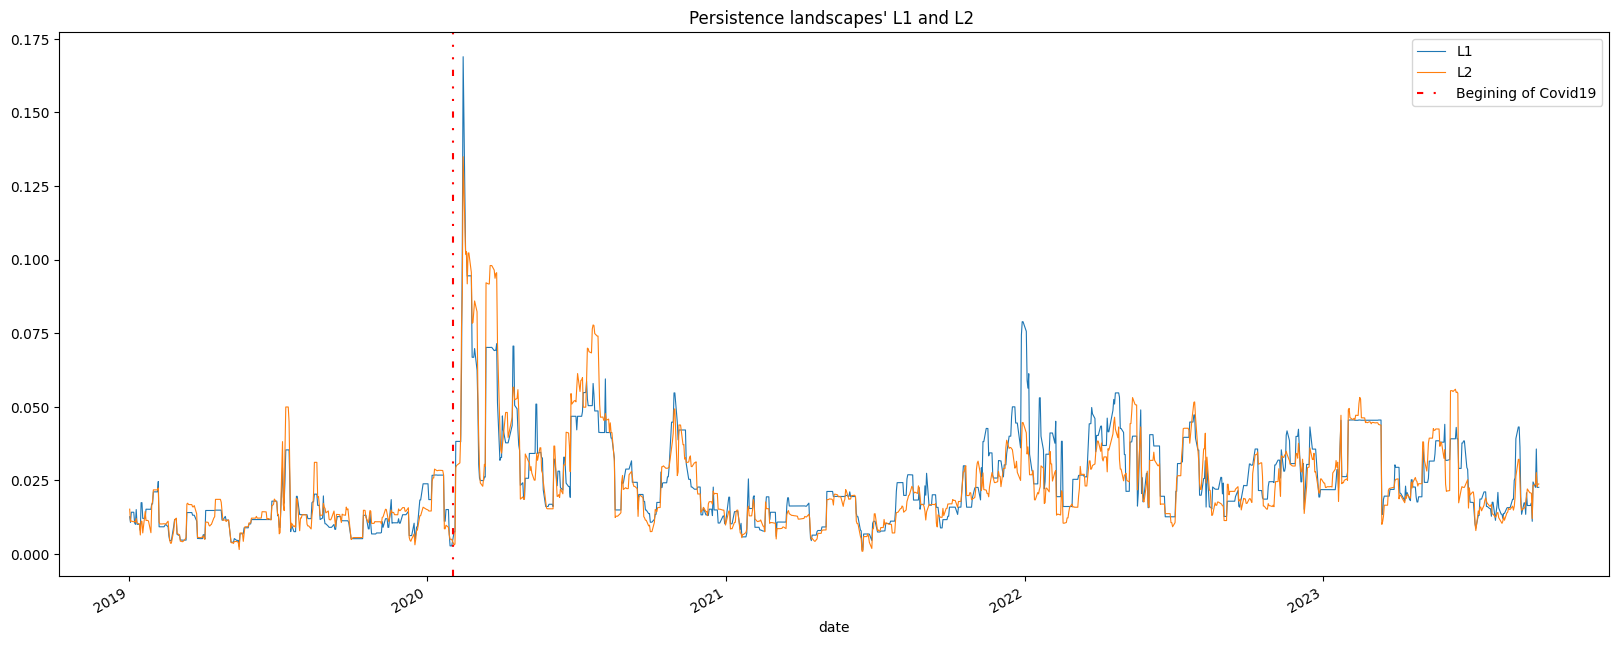

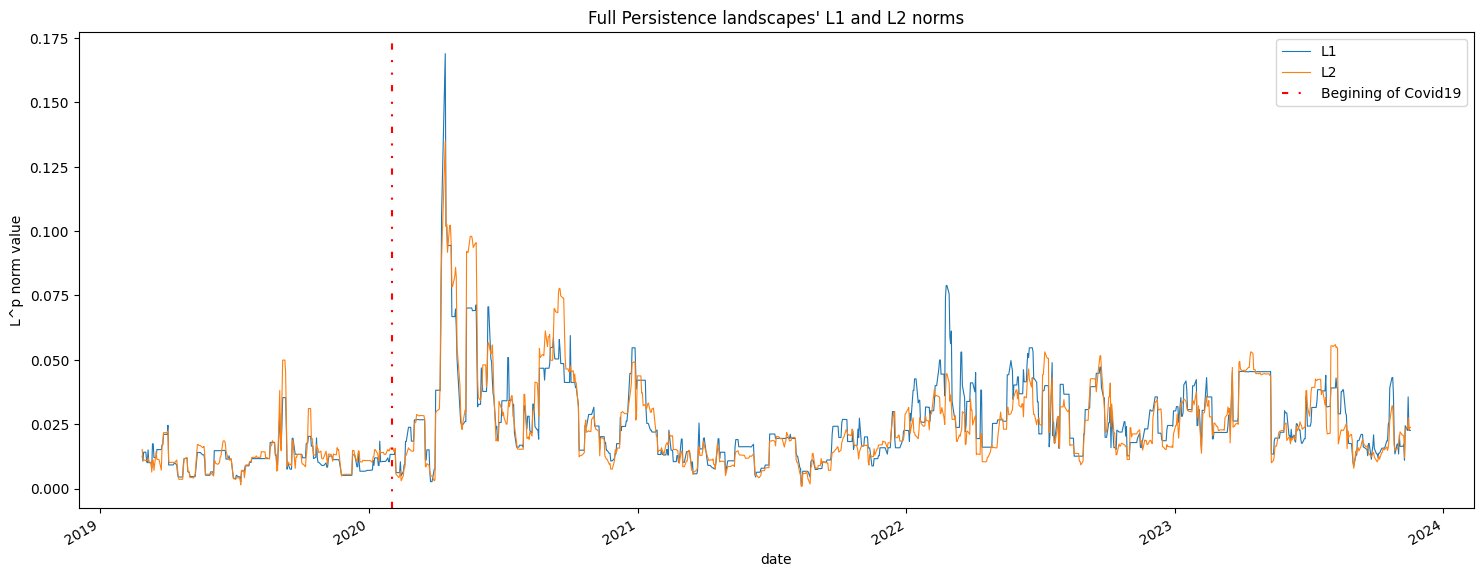

In [11]:
# Computes and print graph of dot-com bubble
df = pd.DataFrame(norms,
                columns = ["L1", "L2"],
                index   = data.index[:-w])
ax = df.plot(figsize = (20, 8),
            lw       = 0.8,
            title    = "Persistence landscapes' L1 and L2 ")
ax.axvline(x         = '2020-02-01',
        color     = 'r',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = 'Begining of Covid19')
ax.legend()
plt.show()
# Computes the full L1 and L2 time series plot
df = pd.DataFrame(norms,
                columns  = ["L1", "L2"],
                index    = data.index[w:])
ax = df.plot(figsize = (18, 7),
            lw      = 0.8,
            ylabel  = "L^p norm value",
            title   = "Full Persistence landscapes' L1 and L2 norms")
ax.axvline(x         = '2020-02-01',
        color     = 'r',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = 'Begining of Covid19')
ax.legend();